<left>
    <a href=img><img src = "https://github.com/tiagottmoraes/CS-s-Data-Science-Test/blob/main/Misc/1c86bfb3-cab0-4255-99bf-24c5488d888a-1632765661247.png?raw=true" width="400"  />
</left>

###### Developed by Tiago Moraes (13.02.2022)

# Data Science Test - Part III

----

The following notebooks presents the complete dataset analysis, exploration and pre-processing steps required to implement a tailored machine learning model designed to **predict the total minutes** ('total_minutes' label) it takes to a shopper to complete a given order.

For that, **3 different notebooks** were prepared for each task, as following:

- **[1. ETL process notebook:](#https://github.com/tiagottmoraes/CS-s-Data-Science-Test/blob/main/1.ETL_-_Data_Science_Test.ipynb)** Complete ETL (data wrangling) process of the provided datasets, including feature engineering, feature transformations, and data standardizations, necessary to carry out all the statistics tests necessaries in the next phase;

- **[2. EDA notebook:](#https://github.com/tiagottmoraes/CS-s-Data-Science-Test/blob/main/2.EDA_-_Data_Science_Test.ipynb)** Statistical exploration and understanding of the pre-processed dataset. Needed to define the best machine learning strategy for the target Label;

- **[3. Machine Learning Model development notebook:](#https://github.com/tiagottmoraes/CS-s-Data-Science-Test/blob/main/3.ML_Model_-_Data_Science_Test.ipynb)** Build, train and test a ML model that takes in the process the dataset, generates a model and deploy it with unseen data to generate predictions ("total_minutes" label)
<br />
<br />

This notebook continues from the previous one (2.EDA - Data Science Test.ipynb) and uses the processed file throughout the entire Machine Learning modeling process.

# 3. Machine Learning modeling - Model definition, training and serving


----

## 1. Importing necessary modules and data

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, train_test_split
import xgboost as xgb
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn import metrics

### 1.1 Loading dataset "df_EDA.csv" obtained from the EDA notebook

After loading the df_EDA.csv into a dataframe called **df_EDA**, let's look at the first five rows using the `head()` function:

In [273]:
filename_EDA = "https://raw.githubusercontent.com/tiagottmoraes/CS-s-Data-Science-Test/main/data/df_EDA.csv"
df_EDA = pd.read_csv(filename_EDA)
df_EDA.head()

,Unnamed: 0,on_demand,seniority,order_size,found_rate,picking_speed,accepted_rate,rating,distance_km,total_minutes
0,0,1,1,19,0.9024,1.30,0.92,4.76,1.818407,67.684264
1,1,1,1,34,0.9024,1.30,0.92,4.76,0.961885,160.336211
2,4,0,4,29,0.8138,1.89,0.84,4.68,3.316783,94.734479
3,5,0,1,10,0.8456,1.93,0.96,4.80,2.704810,74.532256
4,6,0,1,7,0.8456,1.93,0.96,4.80,2.831756,91.192812


In [274]:
#removing the first column ("Unnamed: 0")
df_EDA.drop(['Unnamed: 0'], axis = 1, inplace = True)

## 2. Model definition

Given that this is a regresion problem, this section focused on building several different regression models and test their performance (r-squared and MSE wise). In the end, each model had its accuracy scores stacked against each other in order to define which one is the best to predict `total_minutes` label.</br>
</br>
Considering the wide diiferent types of regression models, teh following were chosen to be fully tested for this case:</br> 
</br>
2.1 Linear Regression</br>
</br>
2.2 Multivariate Linear Regression</br>
</br>
2.3 Polynomial Regression</br>
</br>
2.4 XGBoost</br>
</br>
2.5 Deep Neural Network (DNN)</br>

### 2.1. Linear Regression

The first model evaluated was the simple linear regression. For this model, the `order_size` feature was selected as the independent variable, since it showed the highest Pearson correlation coefficient during the EDA phase.

In [275]:
# Separating the data into features and target
XLR=df_EDA[['order_size']].values
yLR=df_EDA['total_minutes']
XLR.shape, yLR.shape

((7310, 1), (7310,))

#### 2.1.1. Linear REgression model training

Spliting the data into **training** and **testing** sets and build the ML models, where 20% of the total data are separated into a test dataset.

In [276]:
X_trainLR, X_testLR, y_trainLR, y_testLR = train_test_split(XLR, yLR, test_size = 0.2, random_state = 0)
X_trainLR.shape, y_testLR.shape, X_testLR.shape, y_trainLR.shape

((5848, 1), (1462,), (1462, 1), (5848,))

The Linear Regression ("regresssor") was built using scikit learn's `LinearRegresion()` function, as follows. In addition, some regression models evaluation parameters were chosen , in order to help the comparisson between different models

In [277]:
regressor = LinearRegression()
regressor.fit(X_trainLR, y_trainLR)
Y_predLR = regressor.predict(X_testLR)

ActVPred = pd.DataFrame({'Actual': y_testLR, 'Predicted': Y_predLR})
print(ActVPred)

#Evaluating trained Linear Regression model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_testLR, Y_predLR))
print('Mean Squared Error:', metrics.mean_squared_error(y_testLR, Y_predLR))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_testLR, Y_predLR)))
print('R-square: = ', regressor.score(X_testLR, y_testLR))

          Actual   Predicted
5704   42.182726   60.569579
1921  100.251005   81.040004
6917   74.555331   59.365436
39     68.733380   73.815148
613    55.728748   93.081431
...          ...         ...
6270   33.601418   66.590292
276    73.287332   88.264860
6655   58.520109   59.365436
6309   63.443693  108.735286
401    78.350380   76.223434

[1462 rows x 2 columns]
Mean Absolute Error: 20.423629805771597
Mean Squared Error: 694.0734600430256
Root Mean Squared Error: 26.34527396029553
R-square: =  0.3230203766499511


#### 2.1.2. Linear Regression model visualizations

After trained and evaluated, the produced model was plotted alongside the test set datapoints 

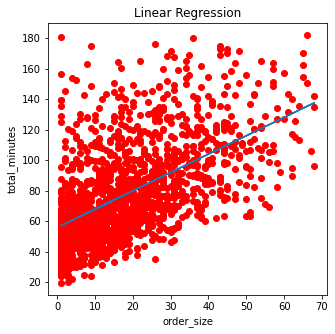

In [278]:
#Using Matplotlib's pyplot interface to plot the results
plt.plot(X_testLR,y_testLR, 'ro')
plt.plot(X_testLR, Y_predLR)
plt.xlabel('order_size')
plt.ylabel('total_minutes')
plt.title('Linear Regression')
plt.show()

In [279]:
#Using plotly's library to plot the interactive results
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter(x = df_EDA['order_size'], y = df_EDA['total_minutes'], title  = 'Completion Time vs Order Complexity', labels = {'x':'Order size', 'y':'Total minutes'})
fig.add_trace(go.Scatter(x = X_testLR.reshape(1462), y = Y_predLR, mode = "lines", name = "Model"))
fig.show()

### 2.2. Multivariate Linear Regression

The Multivariate Linear Regression, as the name implies, is a variation of the simple Linear Regression, that uses several independent variables as inputs. For this model, `order_size`, `distance_km` and `on_demand` were chosen based on correlation analysis developed in the previous notebook

In [280]:
# Separating the data into features and target
X_MLR=df_EDA[['order_size','distance_km','on_demand']].values
y_MLR=df_EDA['total_minutes']
X_MLR.shape, y_MLR.shape

((7310, 3), (7310,))

#### 2.2.1. Multivariate Linear Regression model training

Spliting the data into **training** and **testing** sets and build the ML models, where 20% of the total data are separated into a test dataset.

In [281]:
X_train_MLR, X_test_MLR, y_train_MLR, y_test_MLR = train_test_split(X_MLR, y_MLR, test_size = 0.2, random_state = 0)
X_train_MLR.shape, y_test_MLR.shape, X_test_MLR.shape, y_train_MLR.shape

((5848, 3), (1462,), (1462, 3), (5848,))

The Multivariate Linear Regression ("MLR") was built using scikit learn's `LinearRegresion()` function, but passing in a X_MLR split, composed of three diferente independent variables. In addition, some models evaluation parameters were chosen , in order to help the comparisson between different models

In [282]:
MLR = LinearRegression()
MLR.fit(X_train_MLR, y_train_MLR)
Y_predMLR = MLR.predict(X_test_MLR)

ActVPred = pd.DataFrame({'Actual': y_test_MLR, 'Predicted': Y_predLR})
print(ActVPred)

#Evaluating trained Regression model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_MLR, Y_predMLR))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_MLR, Y_predMLR))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_MLR, Y_predMLR)))
print('R-square: = ', MLR.score(X_test_MLR, y_test_MLR))

          Actual   Predicted
5704   42.182726   60.569579
1921  100.251005   81.040004
6917   74.555331   59.365436
39     68.733380   73.815148
613    55.728748   93.081431
...          ...         ...
6270   33.601418   66.590292
276    73.287332   88.264860
6655   58.520109   59.365436
6309   63.443693  108.735286
401    78.350380   76.223434

[1462 rows x 2 columns]
Mean Absolute Error: 19.798908012131026
Mean Squared Error: 652.7338028885015
Root Mean Squared Error: 25.548655598455696
R-square: =  0.36334190908277886


#### 2.2.2. Multivariate Linear Regression model visualizations

After trained and evaluated, the followung plot shows how the fitted values (blue line) compares, proportionally, against the actual values in the test dataset (red line)

C:\Users\tiago\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\tiago\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



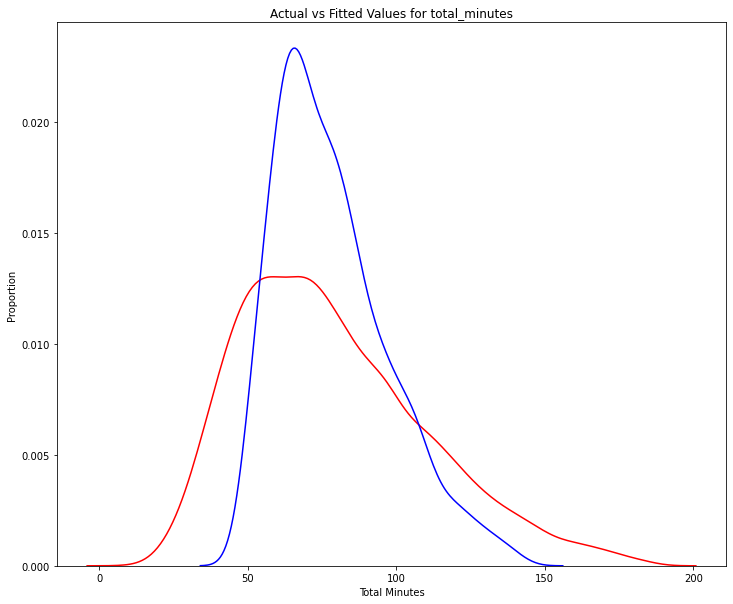

In [283]:
#Using Matplotlib's pyplot interface to plot the results
plt.figure(figsize=(12, 10))

ax1=sns.distplot(df_EDA['total_minutes'], hist=False, color='r',label='Actual Value')
sns.distplot(Y_predMLR, hist=False, color='b', label='Fitted Values', ax=ax1)

plt.title("Actual vs Fitted Values for total_minutes")
plt.xlabel('Total Minutes')
plt.ylabel('Proportion')

plt.show()
plt.close()

### 2.3. Polynomial

Sometimes, the trend of data is not really linear and can look rather curvy. In those cases, the Polynomial regression method can help fit the data into non linear functions (quadratic, cubic, and so on).

In [284]:
# Defining plotting function parameters
def PlotPolly (model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(60,1,200)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, '.', x_new,y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for total minutes ~ order_size')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('total_minutes')

    plt.show()
    plt.close()

#### 2.3.1. Find optimal polinomium degree with cross-validation

Since polynomials can be composed of several different degrees, the following code snippet aimed t perform a cross-validation , in order to find the optimal polynomial degree that return the minimal RMSE value.

Best degree 2 with RMSE 26.491673710464784


Text(0, 0.5, 'RMSE')

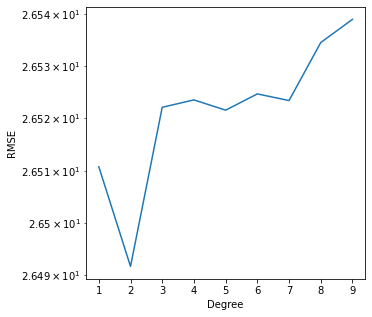

In [285]:
X=df_EDA['order_size'].values.reshape(-1,1)
y=df_EDA['total_minutes']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

rmses = []
degrees = np.arange(1, 10)
min_rmse, min_deg = 1e10, 0

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(x_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(x_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg

# Plot and present results
print('Best degree {} with RMSE {}'.format(min_deg, min_rmse))
        
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')

The 6th degree polynomium was identified as the optimal solution for the given data.

#### 2.3.2. Training the model

In [286]:
# Separating the data into features and target
X_Poly=df_EDA['order_size']
y_Poly=df_EDA['total_minutes']

Now after defining a plotting function and splitting the data into features and target, we can create a polynomial regression model

In [287]:
# Fitting Polynomial Regression to the dataset
f= np.polyfit(X_Poly,y_Poly,6) #6th order polynomial
p = np.poly1d(f)

ActVPred = pd.DataFrame({'Actual': y_Poly, 'Predicted': p(X_Poly)})
print(ActVPred)

#Evaluating the model 
print('Mean Absolute Error:', metrics.mean_absolute_error(df_EDA['total_minutes'], p(X_Poly)))
print('Mean Squared Error:', metrics.mean_squared_error(df_EDA['total_minutes'], p(X_Poly)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(df_EDA['total_minutes'], p(X_Poly))))
print('R-square: = ', r2_score(y_Poly, p(X_Poly)))

          Actual  Predicted
0      67.684264  79.102714
1     160.336211  98.383537
2      94.734479  92.288380
3      74.532256  69.043374
4      91.192812  65.431834
...          ...        ...
7305   97.731233  60.555638
7306   71.825023  53.057708
7307   38.001058  53.057708
7308   84.933859  53.057708
7309   44.399626  53.057708

[7310 rows x 2 columns]
Mean Absolute Error: 20.310466648741134
Mean Squared Error: 672.2563458975005
Root Mean Squared Error: 25.92790670103355
R-square: =  0.3243195962696859


#### 2.3.3. Polynomial regression visualization

After trained and evaluated, the produced model was plotted alongside the test set datapoints 

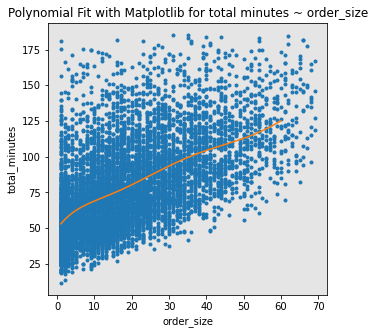

In [288]:
#Plotting the results
PlotPolly(p,X_Poly,y_Poly,'order_size')

### 2.4. XGBoost

XGBoost is a powerful approach for building supervised regression models and belongs to a family of boosting algorithms and uses the gradient boosting (GBM) framework at its core. It is an optimized distributed gradient boosting library

#### 2.4.1. Hyperparameter tuning

Generally, the XGBoost hyperparameters have been divided into 4 categories. They are as follows -

- General parameters
- Booster parameters
- Learning task parameters

In [289]:
#Selecting independent variables and the label for the model
X, y = df_EDA.iloc[:,:-1],df_EDA.iloc[:,-1]
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [56]:
data = df_EDA
X, y = data[data.columns.tolist()[:-1]], data[data.columns.tolist()[-1]]
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}
xgb_model = xgb.XGBRegressor(seed = 20)
clf = GridSearchCV(estimator=xgb_model, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(X, y)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Lowest RMSE:  23.96911611448136


From the hyperparameter tuning , the optimal parameters values are, as follows:

- colsample_bytree': 0.7
- 'learning_rate': 0.1
- 'max_depth': 3
- 'n_estimators': 100

These will be the values to be inputed while training the XGBoost model.

#### 2.4.2. XGBoost model training

Splitting the data into **training** and **testing** sets and build the ML models, where 20% of the total data are separated into a test dataset and fitting the model using `xgb.XGBRegressor()` method.

In [290]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Fitting Polynomial Regression to the dataset
xgb_model = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.7, learning_rate = 0.1,
                max_depth = 3, alpha = 10, n_estimators = 100)
xgb_model = xgb.XGBRegressor()

xgb_model.fit(X_train, y_train)
Y_pred = xgb_model.predict(X_test)

ActVPred = pd.DataFrame({'Actual': y_test, 'Predicted': Y_pred})
print(ActVPred)

#Evaluating the model 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))
print('R-square: = ', xgb_model.score(X_test, y_test))


          Actual  Predicted
2681   61.447811  84.570740
2756   68.395656  64.489967
4379  113.777070  88.008919
6927   54.164115  54.379181
2488  127.804565  93.051765
...          ...        ...
3050   68.637045  58.745270
4394   91.749414  91.193268
1906  128.722035  94.412643
5432   44.856449  52.523155
6528   66.192795  46.121136

[1462 rows x 2 columns]
Mean Absolute Error: 18.447306863715212
Mean Squared Error: 572.1341422686337
Root Mean Squared Error: 23.919325706813595
R-square: =  0.43347210833632144


#### 2.4.3. XGBoost - Visualization

A popular way to visualize the XGBoost models is to examine the importance of each feature column in the original dataset within the model

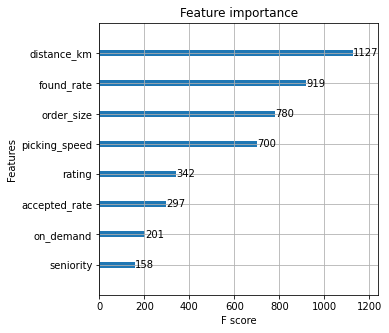

In [291]:
xgb.plot_importance(xgb_model)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

As it can be seen from the graph above, the feature `distance_km` has been given the highest importance score among all the features when using XGBoost models

### 2.5. Deep Neural Network - DNN 

Keras is one of the most popular deep learning libraries in Python for research and development because of its simplicity and ease of use. It uses the Tensorflow backend to build both shallow and deep models without adding much complexity.

#### 2.5.1. Deep Neural Network - Compiling and fitting the model

Here we will define the model with Sequential API, since it is the simplest API to get started with Deep Learning (in comparison to Functional API)

In [292]:
DNN_model=tf.keras.models.Sequential()

X, y = df_EDA.iloc[:,:-1],df_EDA.iloc[:,-1]
n_features = (X.shape[1])

DNN_model.add(tf.keras.layers.Dense(units=8, activation='relu', input_shape=(n_features,)))
DNN_model.add(tf.keras.layers.Dense(units=12, activation='relu')) #activation function
DNN_model.add(tf.keras.layers.Dense(units=8, activation='relu'))

DNN_model.add(tf.keras.layers.Dense(units=1, activation="linear"))

DNN_model.compile(
    optimizer=RMSprop(0.01), #gradient descent optimization algorithm, 0.01 is the learning rate
    loss='MSE', #loss function
    metrics=[tf.keras.metrics.MeanSquaredError()]
    )

M= DNN_model.fit(X_train, y_train, batch_size=15, epochs = 100, verbose=1, validation_data=(X_test, y_test)) # validation_data = evaluate the model

Epoch 1/100
390/390 [==============================] - 1s 2ms/step - loss: 800.1103 - mean_squared_error: 800.1103 - val_loss: 596.3813 - val_mean_squared_error: 596.3813
Epoch 2/100
390/390 [==============================] - 0s 1ms/step - loss: 618.5178 - mean_squared_error: 618.5178 - val_loss: 713.2526 - val_mean_squared_error: 713.2526
Epoch 3/100
390/390 [==============================] - 0s 1ms/step - loss: 608.7066 - mean_squared_error: 608.7066 - val_loss: 593.1465 - val_mean_squared_error: 593.1465
Epoch 4/100
390/390 [==============================] - 0s 1ms/step - loss: 605.1270 - mean_squared_error: 605.1270 - val_loss: 616.3350 - val_mean_squared_error: 616.3350
Epoch 5/100
390/390 [==============================] - 0s 1ms/step - loss: 602.4927 - mean_squared_error: 602.4927 - val_loss: 582.2363 - val_mean_squared_error: 582.2363
Epoch 6/100
390/390 [==============================] - 0s 1ms/step - loss: 594.4013 - mean_squared_error: 594.4013 - val_loss: 580.8717 - val_mea

To evaluate a DNN, it's necesary to look deeper at the loss and MSE scores to see how well training's progressed and check if there's any underfit/overfit. To properly evaluate the model, we'll bring in the yet unseen test set. But first, a hypeparameter tuning might improve the model MSE values.

#### 2.5.2. Deep Neural Network - Hyperparameter tuning

The hyperparameters chosen to be tuned for this model are:

* Learning Rate - A scalar used to train a model via gradient descent;
* Epochs - A full training pass over the entire dataset such that each example has been seen once;
* Batch Size - The number of examples in a batch.

The process of automating hyperparameter tuning is done via KerasRegressor (Scikit learn). Keras Regressor is a hyperparameter search procedure that is performed on a defined grid of hyperparameters (not all hyperparameter combinations are used to train a new model, only some randomly selected)

In [293]:
# Define the model through a user-defined function
def create_model(optimizer=RMSprop(0.01)):
  DNN_model = Sequential()
  n_features = (X.shape[1])
  
  DNN_model.add(tf.keras.layers.Dense(units=8, activation='relu', input_shape=(n_features,)))
  DNN_model.add(tf.keras.layers.Dense(units=12, activation='relu')) #activation function
  DNN_model.add(tf.keras.layers.Dense(units=8, activation='relu'))

  DNN_model.add(tf.keras.layers.Dense(units=1, activation="linear"))
  DNN_model.compile(loss='mse', metrics=['mse'], optimizer=RMSprop(0.01))    # compile the model
  return DNN_model
DNN_model = KerasRegressor(build_fn=create_model, verbose=1)

# Define the hyperparameters grid to be validated
batch_size = [10, 20, 30, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, nb_epoch=epochs)
DNN_model = KerasRegressor(build_fn=create_model, verbose=1)
grid = GridSearchCV(estimator=DNN_model, param_grid=param_grid, cv=5, n_jobs=-1)

# Run the GridSearchCV process
grid_result = grid.fit(X_train, y_train, verbose = 1)

# Print the results of the best model
print('Best params: ' + str(grid_result.best_params_))

293/293 [==============================] - 1s 964us/step - loss: 709.8643 - mse: 709.8643
Best params: {'batch_size': 20, 'nb_epoch': 10}


From the hyperparameter tuning , the optimal parameters values are, as follows:

- 'batch_size': 10
- 'learning_rate': 0.1
- 'epochs': 100

These will be the values to be inputed while training the following DNN model.

#### 2.5.3. Training the DNN with the optimal hyperparameters

Retraining the DNN with the tuned hyperparameters:

In [294]:
DNN_model=tf.keras.models.Sequential()
n_features = (X.shape[1])

DNN_model.add(tf.keras.layers.Dense(units=8, activation='relu', input_shape=(n_features,)))
DNN_model.add(tf.keras.layers.Dense(units=12, activation='relu')) #activation function
DNN_model.add(tf.keras.layers.Dense(units=8, activation='relu'))

DNN_model.add(tf.keras.layers.Dense(units=1, activation="linear"))

DNN_model.compile(
    optimizer=RMSprop(0.01), #gradient descent optimization algorithm, 0.01 is the learning rate
    loss='MSE', #loss function
    metrics=[tf.keras.metrics.MeanSquaredError()]
    )

M= DNN_model.fit(X_train, y_train, batch_size=10, epochs = 100, verbose=1, validation_data=(X_test, y_test)) # validation_data = evaluate the model

Epoch 1/100
585/585 [==============================] - 1s 1ms/step - loss: 829.9591 - mean_squared_error: 829.9591 - val_loss: 726.8896 - val_mean_squared_error: 726.8896
Epoch 2/100
585/585 [==============================] - 1s 1ms/step - loss: 627.3451 - mean_squared_error: 627.3451 - val_loss: 635.4637 - val_mean_squared_error: 635.4637
Epoch 3/100
585/585 [==============================] - 1s 1ms/step - loss: 613.2956 - mean_squared_error: 613.2956 - val_loss: 603.0555 - val_mean_squared_error: 603.0555
Epoch 4/100
585/585 [==============================] - 1s 1ms/step - loss: 611.3523 - mean_squared_error: 611.3523 - val_loss: 579.0268 - val_mean_squared_error: 579.0268
Epoch 5/100
585/585 [==============================] - 1s 1ms/step - loss: 600.4214 - mean_squared_error: 600.4214 - val_loss: 702.1735 - val_mean_squared_error: 702.1735
Epoch 6/100
585/585 [==============================] - 1s 1ms/step - loss: 602.6877 - mean_squared_error: 602.6877 - val_loss: 763.8613 - val_mea

#### 2.5.4. DNN model metrics

After deploying the model, some performance metrics (training and MSE) are plotted to assess the model during training:

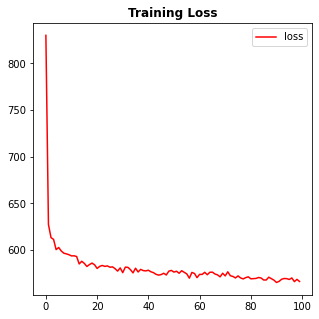

In [295]:
#Evaluating Loss function
plt.plot(M.history['loss'], label='loss',color='red')
plt.title(label='Training Loss', weight ='bold')
plt.legend();

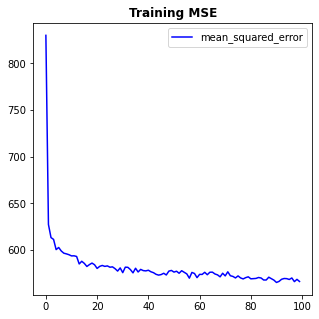

In [296]:
#Evaluating the Mean Squared Error
plt.plot(M.history['mean_squared_error'], label='mean_squared_error',color='blue')
plt.title(label='Training MSE', weight ='bold')
plt.legend();

Printing the summariztion of the obtained metrics after hyperparameter tuning and model training:

In [297]:
#Evaluating the model (R-squared)
yhat_DNN=DNN_model.predict(X_test, steps=1)
r2_score(y_test, yhat_DNN)
print('The R-square is: = ', r2_score(y_test, yhat_DNN))

#Evaluating the model (Mean Squared Error)
mse_DNN = mean_squared_error(y_test,yhat_DNN,squared=True)
print('The Mean squared error of the total_minutes variable is: ', mse_DNN)
    

The R-square is: =  0.43034118313962066
The Mean squared error of the total_minutes variable is:  575.2960504964196


Finally, the trained model is saved in a separated folder.

In [298]:
from tensorflow import saved_model

!mkdir -p saved_model
DNN_model.save('saved_model/DNN')

J� existe uma subpasta ou um arquivo -p.
Erro ao processar: -p.
J� existe uma subpasta ou um arquivo saved_model.
Erro ao processar: saved_model.


INFO:tensorflow:Assets written to: saved_model/DNN\assets


### 2.6. Models' summary

In this section it´s presented the overall performance (R-squared and MSE wise) of each trained model and how they stack against each other

#### 2.6.1. R-Squared overall metrics

In [299]:
#Loading R-squared values from every trained model:
score_model_R2 = {
    'Simple Linear Regression':regressor.score(X_testLR, y_testLR),
    'Multivariate Linear Regression':MLR.score(X_test_MLR, y_test_MLR),
    'Polynomial Regression (6th order)':r2_score(y_Poly, p(X_Poly)),
    'XGBoost': xgb_model.score(X_test, y_test),
    'DNN': r2_score(y_test, yhat_DNN)
}

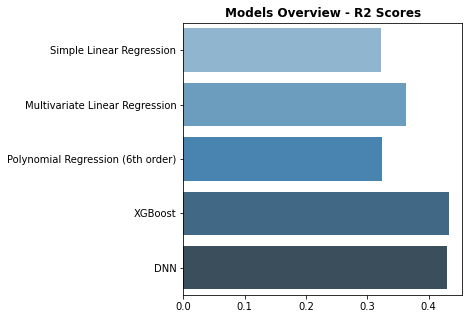

In [300]:
#Ploting R-squared values into a bar chart:
def models_overview(score_model_R2):
    
    model_accuracy = list(score_model_R2.values())
    model_name = list(score_model_R2.keys())

    g = sns.barplot(x = model_accuracy, y = model_name,palette='Blues_d')
    plt.title('Models Overview - R2 Scores', weight='bold');
    return g
    
over_view = models_overview(score_model_R2)

#### 2.6.2. MSE overall metrics

In [301]:
#Loading MSE values from every trained model:
score_model_MSE = {
    'Simple Linear Regression':metrics.mean_squared_error(y_testLR, Y_predLR),
    'Multivariate Linear Regression':metrics.mean_squared_error(y_test_MLR, Y_predMLR),
    'Polynomial Regression (6th order)':metrics.mean_squared_error(df_EDA['total_minutes'], p(X_Poly)),
    'XGBoost':metrics.mean_squared_error(y_test, Y_pred),
    'DNN':mean_squared_error(y_test,yhat_DNN,squared=True)
}

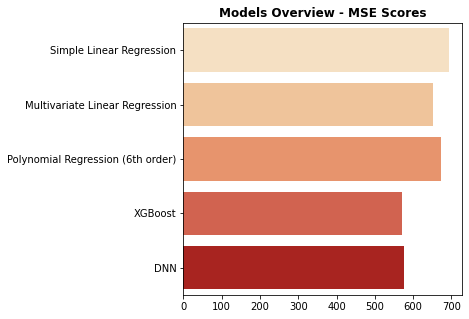

In [302]:
#Ploting MSE values into a bar chart:
def models_overview(score_model_MSE):
    
    model_metrics = list(score_model_MSE.values())
    model_name = list(score_model_MSE.keys())

    g = sns.barplot(x = model_metrics, y = model_name,palette='OrRd')
    plt.title('Models Overview - MSE Scores', weight='bold');
    return g
    
over_view = models_overview(score_model_MSE)

## 3. ML models development conclusions

* Based on the performance results, two models can be considered the best alternatives to make `total_minutes` label predictions: **XGBoost** and the **Deep Neural Network (both with hyperparameter tuning)**.</br>
</br>
* Considering the chosen evaluation metrics (R-squared and MSE), both models outperformed every other tested model, displaying the lowest MSE values and the highest R2 value.</br>
</br>
* A considerable downside of one of the **DNN model** is the high time demand necessary to run it, since it uses a series of hidden layers to perform its computation. </br>
</br>
* **XGBoost**, on the other hand, doesn't much time to train to perform its trainig, while achieving the highest R-squared value (0.434) and the lowest MSE (572.13) metric from all tested models (with the DNN in a close second place).</br>
</br>
* Therefore, we conclude that the **XGBoost** model is the most suitable to predict the target `total_minutes` variable and will be deployed in order to conclude the assignment and generate predicitions on missing `total_minutes` label of the *df_TEST.csv* file.

## 4. Model serving

For this last section, we'll finally make use of the best model (R-squared and MSE wise) and deploy it, ingesting the df_TEST.csv file, that was set apart from the rest of the original dataset (in the last section of the ETL notebook), in order to make `total_minutes` predictions.The chosen model to do so, was the **XGBoost** model, which takes in all independente variables to be able to make the target prediction. 

### 4.1. Making predictions: ingesting df_TEST.csv

First, df_TEST.csv is loaded into a dataframe (features), in order to be consumed by the model:

In [303]:
features = pd.read_csv('https://raw.githubusercontent.com/tiagottmoraes/CS-s-Data-Science-Test/main/data/df_TEST.csv')

In [304]:
# Updating the "seniority" variable, according to the EDA analysis:
features.replace('M', 4, inplace=True) #senior shopper
features.replace('T', 3, inplace=True) #seasoned shopper
features.replace('W',2, inplace=True) #trained shopper
features.replace('I',1, inplace=True)  #novice shopper
features.drop(['Unnamed: 0'], axis=1, inplace=True) #dropping the "Unnamed: 0" column
features.sample(2)

,order_id,store_branch_id,shopper_id,store_lat,store_long,delivery_lat,delivery_long,on_demand,seniority,order_size,found_rate,picking_speed,accepted_rate,rating,distance_km,total_minutes
1846,6465b1f211709d39bc472356df3c7aa6,537d9b6c927223c796cac288cced29df,261fee5b24a8cc3c279cb4571f0c2508,-33.409534,-70.567352,-33.433948,-70.606031,0,1,15,0.8908,1.47,1.00,4.52,4.502599,NaN
267,03721e394d734fc03bb3a7e4a325559d,1679091c5a880faf6fb5e6087eb1b2dc,fd0c75c4920029fa72284812234897a2,-33.370765,-70.512420,-33.365802,-70.499851,1,1,21,0.8851,1.33,0.96,4.68,1.292755,NaN


Then, every other independent variables are set apart and loaded into `Xpred`:

In [305]:
Xpred= features.loc[:,['on_demand', 'seniority', 'order_size', 'found_rate', 'picking_speed', 'accepted_rate', 'rating', 'distance_km']]
data_dmatrix = xgb.DMatrix(data=X,label=y)
Xpred.shape

(1995, 8)

Finnaly, the trained and parameter-optimized XGBoost model is deployed to make predictions:

In [306]:
Y_pred = xgb_model.predict(Xpred)

ActVPred = pd.DataFrame({'Predicted': Y_pred})
print(ActVPred)

       Predicted
0     131.848267
1      80.399437
2     126.746086
3      83.272697
4      57.844566
...          ...
1990   62.720703
1991   63.270771
1992   48.698105
1993   46.544300
1994   65.409416

[1995 rows x 1 columns]


### 4.2. Exporting predicted label

The predicted data is appended into the dataframe and exported to "CS-s-Data-Science-Test" Github repository, as a .csv file. Here is a sample of the output df.TEST, with all `total_minutes` predicted values:


In [307]:
final = features.join(ActVPred)
final.drop(['total_minutes'], axis=1, inplace=True)

In [308]:
final.rename(columns={'Predicted':'predicted_total_minutes'}, inplace=True)

In [309]:
final.sample(5)

,order_id,store_branch_id,shopper_id,store_lat,store_long,delivery_lat,delivery_long,on_demand,seniority,order_size,found_rate,picking_speed,accepted_rate,rating,distance_km,predicted_total_minutes
1635,e5e928f447322c330851bae5ea7825c7,efb76cff97aaf057654ef2f38cd77d73,78819bbde7159af690bf17f81bb6e6dc,-33.600368,-70.575929,-33.570456,-70.590704,1,4,20,0.8503,1.85,0.84,4.96,3.590029,89.327728
792,de3ea8f21f89d44ad379d385a0c91f6d,1f0e3dad99908345f7439f8ffabdffc4,bfae8e86f09e4166f852e0899ece3c8b,-33.386547,-70.568075,-33.423916,-70.577215,0,4,16,0.8457,1.57,0.36,4.80,4.230967,87.458763
573,3cd9c8f7cb0677474a2b2f6383369985,1f0e3dad99908345f7439f8ffabdffc4,0767af70bf9cff8914014d38c1e14296,-33.386547,-70.568075,-33.406474,-70.558988,0,1,14,0.8634,1.24,1.00,4.80,2.366269,80.881081
783,260ad2d9683ae9724d7b8e1f3064e894,1f0e3dad99908345f7439f8ffabdffc4,8fbff107fd8af0847dc6e4dcf091af1a,-33.386547,-70.568075,-33.394829,-70.561225,1,4,26,0.8929,1.67,0.76,4.76,1.118015,73.243408
1162,83c4233df89e4a0cdc1efd6819a8163c,5751ec3e9a4feab575962e78e006250d,b7a14a6135707eab5393dd60ba485302,-33.463001,-70.575301,-33.436864,-70.597009,1,1,13,0.8695,1.14,0.92,4.76,3.532328,60.797691


Exporting the final solution of the assignment:

In [310]:
final.to_csv('Predictions.csv')